# Linear Regression in PyTorch

In Progress.

Allows us to understand relation between two continous variables

y = f(x) + c

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)

In [3]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311])

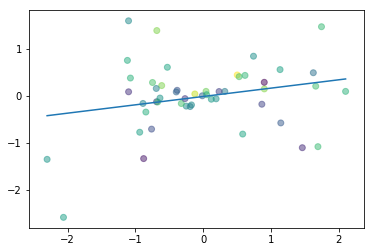

In [4]:
y = x * (np.random.randn(n))
colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.scatter(x, y, c = colors, alpha = 0.5)
plt.show()

# Pytorch Way

##### Building your own dataset
Following the equation y=2x+1

In [5]:
x_values = list()
for i in range(0,11):
    x_values.append(i)

In [6]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
x_train = np.array(x_values, dtype = np.float32)
print(x_train)
print(type(x_train))
print(x_train.shape)
x_train = x_train.reshape(-1,1)
print(x_train.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
<class 'numpy.ndarray'>
(11,)
(11, 1)


In [8]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype = np.float32)
print(y_train)
print(type(y_train))
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]
<class 'numpy.ndarray'>
(11,)
(11, 1)


In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [11]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim, output_dim = 1, 1

In [13]:
model = LinearRegression(input_dim, output_dim)

In [14]:
model.train()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [15]:
criterion = nn.MSELoss()

In [16]:
learning_rate = 0.01

In [17]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [18]:
epochs = 100

for epoch in range(epochs):
    epoch = epoch + 1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    ouputs = model(inputs)
    
    loss = criterion(ouputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    print("Epoch: {}, Loss: {}".format(epoch, loss.data[0]))
    

Epoch: 1, Loss: 107.191650390625
Epoch: 2, Loss: 9.15524959564209
Epoch: 3, Loss: 1.1541284322738647
Epoch: 4, Loss: 0.4969533085823059
Epoch: 5, Loss: 0.4388514459133148
Epoch: 6, Loss: 0.42966410517692566
Epoch: 7, Loss: 0.42451655864715576
Epoch: 8, Loss: 0.4197474420070648
Epoch: 9, Loss: 0.41505783796310425
Epoch: 10, Loss: 0.41042280197143555
Epoch: 11, Loss: 0.4058395326137543
Epoch: 12, Loss: 0.4013076722621918
Epoch: 13, Loss: 0.3968265652656555
Epoch: 14, Loss: 0.39239510893821716
Epoch: 15, Loss: 0.3880133330821991
Epoch: 16, Loss: 0.383680522441864
Epoch: 17, Loss: 0.3793956935405731
Epoch: 18, Loss: 0.37515926361083984
Epoch: 19, Loss: 0.3709697425365448
Epoch: 20, Loss: 0.3668273985385895
Epoch: 21, Loss: 0.36273109912872314
Epoch: 22, Loss: 0.35868039727211
Epoch: 23, Loss: 0.3546751141548157
Epoch: 24, Loss: 0.35071465373039246
Epoch: 25, Loss: 0.34679844975471497
Epoch: 26, Loss: 0.3429257869720459
Epoch: 27, Loss: 0.3390960395336151
Epoch: 28, Loss: 0.3353094756603241

In [19]:
predicted = model(Variable(torch.from_numpy(x_train))).data.cpu().numpy()

In [20]:
predicted

array([[ 0.28102824],
       [ 2.3845668 ],
       [ 4.4881053 ],
       [ 6.591644  ],
       [ 8.695182  ],
       [10.79872   ],
       [12.902259  ],
       [15.005797  ],
       [17.109337  ],
       [19.212875  ],
       [21.316414  ]], dtype=float32)

In [21]:
# y = 2x+1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

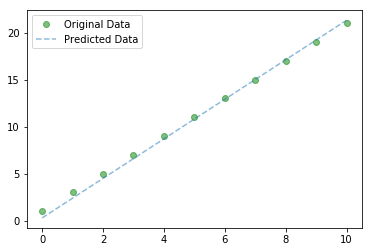

In [22]:
plt.clf()

predicted = model(Variable(torch.from_numpy(x_train))).data.cpu().numpy()

plt.plot(x_train, y_train, 'go', label = "Original Data", alpha = 0.5)

plt.plot(x_train, predicted, "--", label = "Predicted Data", alpha = 0.5)

plt.legend(loc = "best")

plt.show()
